In [99]:
import numpy as np
import torch
import torch.nn as nn
import tensorflow as tf
import matplotlib.pyplot as plt

In [100]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


## Data Preprocessing

In [101]:
with open('dataset.txt', 'r', encoding='utf-8') as f:
    text = f.read()

chars = sorted(set(text))
print(chars)

['\n', ' ', '!', '&', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '£', '½', 'à', 'â', 'æ', 'è', 'é', 'œ', '—', '‘', '’', '“', '”']


In [102]:
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
print (string_to_int)
print (int_to_string)


{'\n': 0, ' ': 1, '!': 2, '&': 3, '(': 4, ')': 5, '*': 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '?': 22, 'A': 23, 'B': 24, 'C': 25, 'D': 26, 'E': 27, 'F': 28, 'G': 29, 'H': 30, 'I': 31, 'J': 32, 'K': 33, 'L': 34, 'M': 35, 'N': 36, 'O': 37, 'P': 38, 'Q': 39, 'R': 40, 'S': 41, 'T': 42, 'U': 43, 'V': 44, 'W': 45, 'X': 46, 'Y': 47, 'Z': 48, '_': 49, 'a': 50, 'b': 51, 'c': 52, 'd': 53, 'e': 54, 'f': 55, 'g': 56, 'h': 57, 'i': 58, 'j': 59, 'k': 60, 'l': 61, 'm': 62, 'n': 63, 'o': 64, 'p': 65, 'q': 66, 'r': 67, 's': 68, 't': 69, 'u': 70, 'v': 71, 'w': 72, 'x': 73, 'y': 74, 'z': 75, '£': 76, '½': 77, 'à': 78, 'â': 79, 'æ': 80, 'è': 81, 'é': 82, 'œ': 83, '—': 84, '‘': 85, '’': 86, '“': 87, '”': 88}
{0: '\n', 1: ' ', 2: '!', 3: '&', 4: '(', 5: ')', 6: '*', 7: ',', 8: '-', 9: '.', 10: '0', 11: '1', 12: '2', 13: '3', 14: '4', 15: '5', 16: '6', 17: '7', 18: '8', 19: '9', 20: ':', 21: ';', 22: '?', 23: 'A',

In [103]:
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

data = encode(text)

In [104]:
print(string_to_int['a'])

50


In [105]:
# Encoding: Input=abc , output= [51 52 53] # the integer values assigned to the unique characters in the list
# encode = lambda s: [string_to_int[c] for c in s] is the easier version of doing the same thing 

def encode(list_of_characters, string_to_int):
    encoded_value=[]
    for char in list_of_characters:
        encoded_value.append(string_to_int[char])
    
    return encoded_value

#encoded_value = encode('abc', string_to_int)
#print(encoded_value) # [50, 51, 52]


In [106]:
# Inverse version of encoding 

def decode(list_of_encoded_int, int_to_string):
    decoded_value=[]
    for int in list_of_encoded_int:
        (decoded_value.append(int_to_string[int]))

    return ''.join(decoded_value)


In [107]:
encoded_value = encode('hello', string_to_int)
print(encoded_value)
decoded_value = decode(encoded_value, int_to_string)
print(decoded_value)

[57, 54, 61, 61, 64]
hello


In [168]:
data = encode(text, string_to_int)
ratio = 0.8
train_data = data[: int(ratio*len(data))]
valid_data = data[int(ratio*len(data)): len(data)]
vocab_size = len(chars) # number of individual characters

In [169]:
print(len(data))
print(len(train_data))
print(len(valid_data))

562286
449828
112458


In [170]:
# without block sizing
# Here input sequence in just a single character
# output is predicted as a next character based on just one previous character.
# this can be called as block size = 1
# the model predicts pe the the the the the the the the the the the the
# Not bad!!!

input_seq = train_data[:int(len(train_data))-1]
label = train_data[1:int(len(train_data))]

valid_input_seq = valid_data[: int(len(valid_data))-1]
valid_label = valid_data[1: int(len(valid_data))]

# Now considering the block size of 5
# based on previous five characters, the next character is predicted.
# I assume the better performance now 
# bs is the block size

block_size = 8
input_seq_bs = []
label_bs = []
valid_input_seq_bs= []
valid_label_bs = []

for i in range(len(train_data)-block_size):
    input_seq_bs.append(train_data[i:i+block_size])
    label_bs.append(train_data[i+block_size])

for i in range(len(valid_data)-block_size):
    valid_input_seq_bs.append(valid_data[i:i+block_size])
    valid_label_bs.append(valid_data[i+block_size])
    

In [171]:
print(input_seq_bs[:3])
print(label_bs[:3])

[[42, 57, 54, 1, 23, 53, 71, 54], [57, 54, 1, 23, 53, 71, 54, 63], [54, 1, 23, 53, 71, 54, 63, 69]]
[63, 69, 70]


In [172]:
print(input_seq[:10])
print(label[:10])

[42, 57, 54, 1, 23, 53, 71, 54, 63, 69]
[57, 54, 1, 23, 53, 71, 54, 63, 69, 70]


In [160]:
input_seq =  torch.tensor(input_seq)
label = torch.tensor(label)

valid_input_seq = torch.tensor(valid_input_seq)
valid_label = torch.tensor(valid_label)

## Steps

1. Define Model, Include learning the embeddings of the character
2. Input is the character
3. Target is the next character
4. Train with the optimizers

## Without Blocking

In [161]:
# Model 
# Start with the baasic model without block sizing

embedding_dim = 8  # Dimension of the embedding space
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Embedding layer
    # tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=vocab_size),  # Embedding layer
    tf.keras.layers.Flatten(),  # Flatten the output of the embedding layer
    tf.keras.layers.Dense(64, activation='relu'),  # A hidden dense layer with ReLU
    tf.keras.layers.Dense(vocab_size, activation='softmax')  # Output layer to predict next character
])

In [162]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model_compiled = model.fit(input_seq, label, epochs=20, batch_size=32, validation_data=(valid_input_seq, valid_label), verbose=0)

Text(0, 0.5, 'Training Loss ')

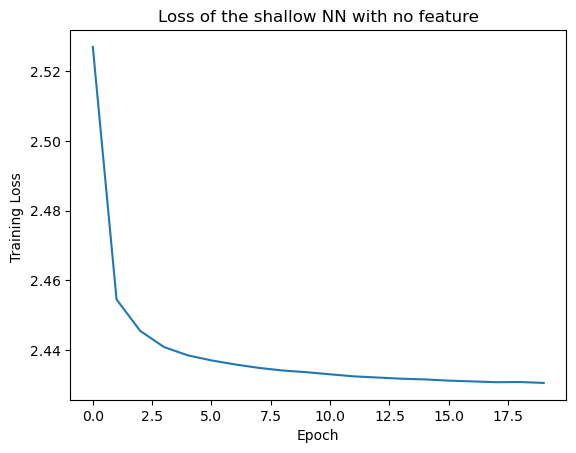

In [163]:
loss = model_compiled.history['loss']
plt.figure()
plt.plot(loss)
plt.title('Loss of the shallow NN with no feature')
plt.xlabel('Epoch')
plt.ylabel('Training Loss ')

### Prediction based on model without blocking

In [167]:
start_char = encode('h', string_to_int)
current_char = start_char
text_len = 50
predicted_text = []
# predicted_text.append(start_char)
print(current_char)
for i in range(text_len): 
    # predict_input_encode = torch.tensor(current_char)
    predicted_probs = model.predict(torch.tensor(current_char), verbose=0)[0]
    current_char = np.argmax(predicted_probs)
    predicted_text.append(current_char)
    current_char = [current_char]


predicted_text_decoded = decode(predicted_text, int_to_string)
print(predicted_text_decoded)


[57]
e the the the the the the the the the the the the 


## Model with blocking

In [173]:
input_seq_bs =  torch.tensor(input_seq_bs)
label_bs = torch.tensor(label_bs)

valid_input_seq_bs = torch.tensor(valid_input_seq_bs)
valid_label_bs = torch.tensor(valid_label_bs)

print("Input shape:", tf.shape(input_seq_bs))
print("Label shape:", tf.shape(label_bs))

print("Input shape:", tf.shape(valid_input_seq_bs))
print("Label shape:", tf.shape(valid_label_bs))

Input shape: tf.Tensor([449820      8], shape=(2,), dtype=int32)
Label shape: tf.Tensor([449820], shape=(1,), dtype=int32)
Input shape: tf.Tensor([112450      8], shape=(2,), dtype=int32)
Label shape: tf.Tensor([112450], shape=(1,), dtype=int32)


In [191]:
# Model including the block sizing 
embedding_dim = 16
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Embedding layer
    tf.keras.layers.Flatten(),  # Flatten the output of the embedding layer
    tf.keras.layers.Dense(64, activation='relu'),  # A hidden dense layer with ReLU
    tf.keras.layers.Dense(vocab_size, activation='softmax')  # Output layer to predict next character
])

In [192]:
model_1(input_seq_bs)
model_1.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ (449820, 8, 16)        │         1,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (449820, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (449820, 64)           │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (449820, 89)           │         5,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,465 (60.41 KB)

 Trainable params: 15,465 (60.41 KB)

 Non-trainable params: 0 (0.00 B)

In [193]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model_1_compiled = model_1.fit(input_seq_bs, label_bs, epochs=100, batch_size=32, validation_data=(valid_input_seq_bs, valid_label_bs))


Epoch 1/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 427us/step - loss: 2.3933 - val_loss: 1.9469
Epoch 2/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 430us/step - loss: 1.9161 - val_loss: 1.8528
Epoch 3/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 7s 479us/step - loss: 1.8427 - val_loss: 1.8188
Epoch 4/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 417us/step - loss: 1.8078 - val_loss: 1.8013
Epoch 5/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 444us/step - loss: 1.7845 - val_loss: 1.7796
Epoch 6/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 433us/step - loss: 1.7685 - val_loss: 1.7784
Epoch 7/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 417us/step - loss: 1.7643 - val_loss: 1.7660
Epoch 8/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 419us/step - loss: 1.7491 - val_loss: 1.7647
Epoch 9/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 419us/step - loss: 1.7434 - val_loss: 1.7565
Epoch 10/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 6s 424us/step - loss: 1.7431 - val_loss: 1.7510
Epoch 11/100
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 7s 480us/step - loss: 1

Text(0, 0.5, 'Training Loss ')

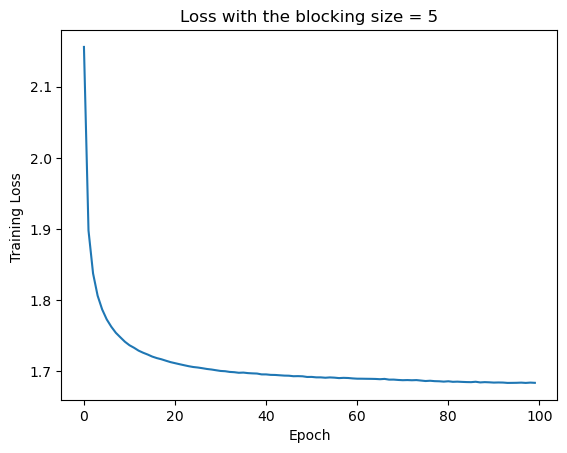

In [195]:
loss1 = model_1_compiled.history['loss']
plt.figure()
plt.plot(loss1)
plt.title('Loss with the blocking size = 5')
plt.xlabel('Epoch')
plt.ylabel('Training Loss ')

### Prediction based on model without blocking

In [198]:
# Inference on the model trained with the block sizing 

start_char = torch.tensor(encode('I want s', string_to_int))
current_char_list = start_char.reshape(1, -1)
predicted_text = current_char_list
text_len=50
for i in range (text_len):
    # print('Current charcter list', current_char_list)
    predicted_probs = model_1.predict(current_char_list, verbose=0)[0]
    next_char = torch.tensor([[np.argmax(predicted_probs)]])
    # print('Next predicted character', next_char)
    predicted_text = torch.cat((predicted_text, next_char), dim=1)
    # print('Predicted text list', predicted_text)
    current_char_list = predicted_text[:, -block_size:]

predicted_text = predicted_text.tolist()[0]
print(predicted_text)
predicted_text_decoded = decode(predicted_text, int_to_string)
print(predicted_text_decoded)
# decoded = decode([next_char], int_to_string)
# print(decoded)

[31, 1, 72, 50, 63, 69, 1, 68, 64, 62, 54, 1, 69, 57, 50, 69, 1, 69, 57, 54, 1, 68, 69, 50, 69, 54, 67, 1, 69, 57, 54, 1, 68, 69, 67, 54, 54, 69, 1, 69, 57, 54, 1, 68, 69, 50, 69, 54, 67, 1, 69, 57, 54, 1, 68, 69, 67, 54]
I want some that the stater the street the stater the stre


## Model with blocking and Convolution

In [213]:
# Model including the block sizing 
embedding_dim = 16
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Embedding layer
    tf.keras.layers.LSTM(64, return_sequences=False),  # LSTM layer with 64 units
    tf.keras.layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    tf.keras.layers.Dense(vocab_size, activation='softmax')  # Output layer for prediction
])


In [214]:
model_2(input_seq_bs)
model_2.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)        │ (449820, 8, 16)        │         1,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (449820, 64)           │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (449820, 64)           │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (449820, 89)           │         5,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,105 (125.41 KB)

 Trainable params: 32,105 (125.41 KB)

 Non-trainable params: 0 (0.00 B)

In [215]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model_2_compiled = model_2.fit(input_seq_bs, label_bs, epochs=30, batch_size=32, validation_data=(valid_input_seq_bs, valid_label_bs))


Epoch 1/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 2.4418 - val_loss: 1.8477
Epoch 2/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 1.8172 - val_loss: 1.7046
Epoch 3/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 1.6826 - val_loss: 1.6424
Epoch 4/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 1.6156 - val_loss: 1.5989
Epoch 5/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 1.5720 - val_loss: 1.5766
Epoch 6/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 1.5410 - val_loss: 1.5602
Epoch 7/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 1.5192 - val_loss: 1.5562
Epoch 8/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 1.5044 - val_loss: 1.5428
Epoch 9/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 1.4861 - val_loss: 1.5367
Epoch 10/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 1.4794 - val_loss: 1.5359
Epoch 11/30
14057/14057 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 1.4676 - val_loss: 1.52

Text(0, 0.5, 'Training Loss ')

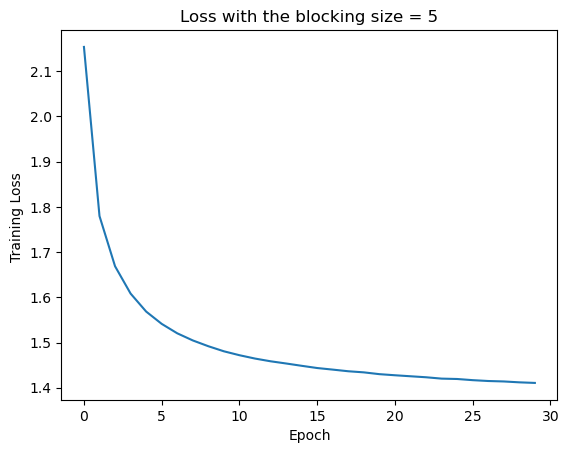

In [216]:
loss2 = model_2_compiled.history['loss']
plt.figure()
plt.plot(loss2)
plt.title('Loss with the blocking size = 5')
plt.xlabel('Epoch')
plt.ylabel('Training Loss ')

In [217]:
# Inference on the model trained with the block sizing 

start_char = torch.tensor(encode('I want s', string_to_int))
current_char_list = start_char.reshape(1, -1)
predicted_text = current_char_list
text_len=50
for i in range (text_len):
    # print('Current charcter list', current_char_list)
    predicted_probs = model_2.predict(current_char_list, verbose=0)[0]
    next_char = torch.tensor([[np.argmax(predicted_probs)]])
    # print('Next predicted character', next_char)
    predicted_text = torch.cat((predicted_text, next_char), dim=1)
    # print('Predicted text list', predicted_text)
    current_char_list = predicted_text[:, -block_size:]

predicted_text = predicted_text.tolist()[0]
print(predicted_text)
predicted_text_decoded = decode(predicted_text, int_to_string)
print(predicted_text_decoded)
# decoded = decode([next_char], int_to_string)
# print(decoded)

[31, 1, 72, 50, 63, 69, 1, 68, 64, 1, 69, 57, 54, 1, 68, 69, 67, 54, 54, 69, 1, 64, 55, 1, 69, 57, 54, 1, 68, 69, 67, 54, 54, 69, 1, 64, 55, 1, 69, 57, 54, 1, 68, 69, 67, 54, 54, 69, 1, 64, 55, 1, 69, 57, 54, 1, 68, 69]
I want so the street of the street of the street of the st
